In [12]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
import operator


class State(TypedDict):
    counter: int
    alphabet: list[str]


def node_a(state: State):
    state['counter'] += 1
    state['alphabet'] = ["Hello"]
    return state

graph_builder = StateGraph(State)

graph_builder.add_node("Chatbot", node_a)
graph_builder.add_edge(START, "Chatbot")
graph_builder.add_edge("Chatbot", END)

graph = graph_builder.compile()

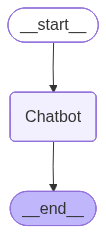

In [13]:
graph

In [14]:
initial_state = {
    'counter': 0,
    'alphabet': []
}

state = initial_state

for _ in range(3):
    state = graph.invoke(state)
    print(state)

{'counter': 1, 'alphabet': ['Hello']}
{'counter': 2, 'alphabet': ['Hello']}
{'counter': 3, 'alphabet': ['Hello']}


In [15]:
class State(TypedDict):
    counter: int
    alphabet: Annotated[list[str], operator.add]

def node_a(state: State):
    state['counter'] += 1
    state['alphabet'] = ["Hello"]
    return state

graph_builder = StateGraph(State)
graph_builder.add_node("Chatbot", node_a)
graph_builder.add_edge(START, "Chatbot")
graph_builder.add_edge("Chatbot", END)

graph = graph_builder.compile()

In [16]:
initial_state = {
    'counter': 0,
    'alphabet': []
}

state = initial_state

for _ in range(3):
    state = graph.invoke(state)
    print(state)

{'counter': 1, 'alphabet': ['Hello']}
{'counter': 2, 'alphabet': ['Hello', 'Hello']}
{'counter': 3, 'alphabet': ['Hello', 'Hello', 'Hello']}


In [5]:
from typing import Annotated
import os
# from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages


load_dotenv()


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)
llm = ChatGoogleGenerativeAI(
        model="gemini-2.5-flash",
        api_key=os.environ.get("GOOGLE_API_KEY"),
        temperature=0,
        max_tokens=1024,
        timeout=None,
        max_retries=2,
        disable_streaming=False,
    )
def chatbot(state: State):
    response = llm.invoke(state['messages'])
    return {"messages": [response]}


graph_builder.add_node("Chatbot", chatbot)
graph_builder.set_entry_point("Chatbot")
graph_builder.set_finish_point("Chatbot")
graph = graph_builder.compile()


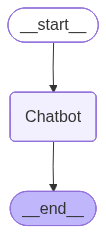

In [28]:
graph

In [29]:
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"].content)


Assistant: 


In [31]:
from typing import Annotated
import os
# from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.graph.message import MessagesState


load_dotenv()

graph_builder = StateGraph(MessagesState)
llm = ChatGoogleGenerativeAI(
        model="gemini-2.5-flash",
        api_key=os.environ.get("GOOGLE_API_KEY"),
        temperature=0,
        max_tokens=1024,
        timeout=None,
        max_retries=2,
        disable_streaming=False,
    )
def chatbot(state: State):
    response = llm.invoke(state['messages'])
    return {"messages": [response]}


graph_builder.add_node("Chatbot", chatbot)
graph_builder.set_entry_point("Chatbot")
graph_builder.set_finish_point("Chatbot")
graph = graph_builder.compile()


In [33]:
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


Assistant: Hi there! How can I help you today?


/Users/najongseong/git_repository/teleai_lg/.venv/lib/python3.11/site-packages/langchain_google_genai/chat_models.py:2316: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(


ValueError: No content messages found. The Gemini API requires at least one non-system message (HumanMessage, AIMessage, etc.) in addition to any SystemMessage. Please include additional messages in your input.